In [69]:
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from exact_solution import solve_master_equation, one_excited_emitter_state

In [70]:
def load_data(file_path):
    data = {f"{i:04b}": [] for i in range(16)}
    with open(file_path, 'r') as fp:
        lines = fp.readlines()

    for line in lines:
        if not line:
            continue
        l = line.strip().lstrip('[').rstrip(']')
        for l, v in zip(data.values(), l.split(',')):
            l.append(float(v.strip(' ')))

    return data

# JAQAL RAW
data = load_data('../data/QSCOUT/exp_data.txt')
qscout_results = pd.DataFrame.from_dict(data)

In [71]:
N = 3
g = 2
kappa = 5
times = np.linspace(0, 3, 51)

In [72]:
initial_state = one_excited_emitter_state(N, 1)
qutip_results = solve_master_equation(N, g, kappa, initial_state, times)

In [73]:
qscout_bitstrs = {
    "Emitter 1": "0010",
    "Emitter 2": "0100",
    "Emitter 3": "1000",
    "Cavity + Environment": "0001",
}

jaqal_normed_bitstrs = {
    "Emitter 1": "0010",
    "Emitter 2 and 3": "avg_0100_1000",
    "Cavity + Environment": "0001",
}

In [74]:
jaqal_results_norm = qscout_results.copy()
jaqal_results_norm[['1000', '0100', '0010', '0001']] = jaqal_results_norm[['1000', '0100', '0010', '0001']].divide(jaqal_results_norm[['1000', '0100', '0010', '0001']].sum(axis=1), axis=0)
jaqal_results_norm['avg_0100_1000'] = jaqal_results_norm[['0100', '1000']].mean(axis=1)

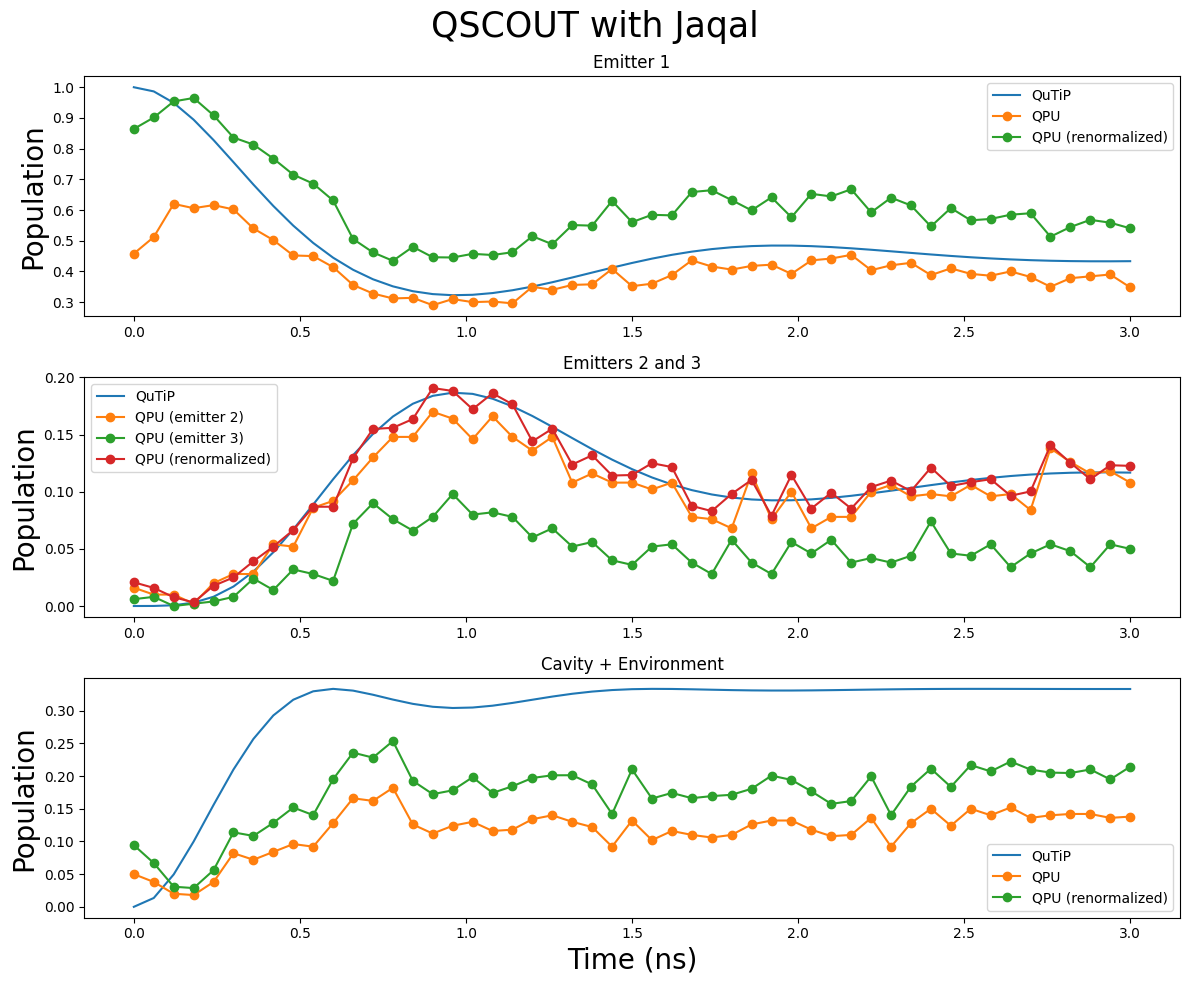

In [75]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

axes[0].set_title("Emitter 1")
axes[0].plot(times, qutip_results["Emitter 1"], label="QuTiP")
axes[0].plot(times, qscout_results[qscout_bitstrs["Emitter 1"]], marker='o', label="QPU")
axes[0].plot(times, jaqal_results_norm[jaqal_normed_bitstrs["Emitter 1"]], marker='o', label="QPU (renormalized)")
axes[0].set_ylabel("Population", fontsize=20)
axes[0].legend()

axes[1].set_title("Emitters 2 and 3")
axes[1].plot(times, qutip_results["Emitter 2"], label="QuTiP")
axes[1].plot(times, qscout_results[qscout_bitstrs["Emitter 2"]], marker='o', label="QPU (emitter 2)")
axes[1].plot(times, qscout_results[qscout_bitstrs["Emitter 3"]], marker='o', label="QPU (emitter 3)")
axes[1].plot(times, jaqal_results_norm["avg_0100_1000"], marker='o', label="QPU (renormalized)")
axes[1].set_ylabel("Population", fontsize=20)
axes[1].legend()

axes[2].set_title("Cavity + Environment")
axes[2].plot(times, qutip_results["Cavity + Environment"], label="QuTiP")
axes[2].plot(times, qscout_results[qscout_bitstrs["Cavity + Environment"]], marker='o', label="QPU")
axes[2].plot(times, jaqal_results_norm[jaqal_normed_bitstrs["Cavity + Environment"]], marker='o', label="QPU (renormalized)")
axes[2].set_ylabel("Population", fontsize=20)
axes[2].legend()


axes[-1].set_xlabel("Time (ns)", fontsize=20)


# for a, column in zip(axes.flatten(), jaqal_normed_bitstrs):
#     a.set_title(column, fontsize=20)
#     a.plot(qutip_results.index, qutip_results[column], label="QuTiP")

#     qscout_raw = qscout_results
#     qscout_column = qscout_bitstrs[column]
#     a.plot(times, qscout_raw[qscout_column], marker='o', label="QPU")

#     a.tick_params(axis='x', labelsize=13)
#     a.tick_params(axis='y', labelsize=13)

# axes[0][0].set_xticklabels([])
# axes[0][1].set_xticklabels([])

# axes[1][0].set_xlabel("Time (ns)", fontsize=20)
# axes[1][1].set_xlabel("Time (ns)", fontsize=20)

# axes[0][0].set_ylabel("Population", fontsize=20)
# axes[1][0].set_ylabel("Population", fontsize=20)

# axes[1][1].legend(fontsize=13)

fig.suptitle("QSCOUT with Jaqal", fontsize=25)
plt.tight_layout()


In [76]:
fig.savefig("../figures/QSCOUT_jaqal_raw.eps")